In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [3]:
dataset = pd.read_csv("F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Project/Dataset/sepsis_data.csv")
dataset.shape

(58376, 41)

In [4]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [5]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=37945,random_state=123)

In [6]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [7]:
df_upsampled.SepsisLabel.value_counts()

0    57070
1    37945
Name: SepsisLabel, dtype: int64

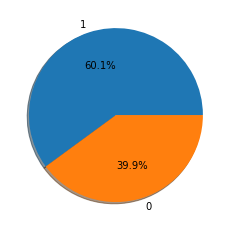

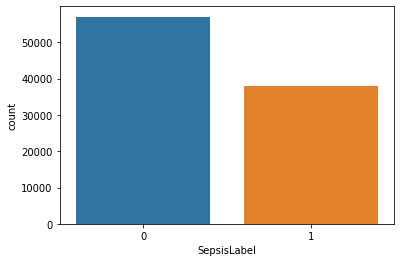

In [8]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [9]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [10]:
Y = df_upsampled[df_upsampled.columns[40:]].values
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [11]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (95015, 41)


In [12]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (95015, 40)


In [13]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (95015, 1)


In [14]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(76012, 40)
Testing data dimensions :(19003, 40)


In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier

In [18]:
clf=MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=100,
    learning_rate_init=1e-5,
    tol=1e-4,)

In [19]:
clf.fit(X_train, Y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=100, random_state=1,
              solver='lbfgs')

In [20]:
import gzip, pickle

In [21]:
filename = 'F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Projectfinalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [22]:
import joblib
model = joblib.load('F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Projectfinalized_model.sav')

In [23]:
predicted = model.predict(X_test)
print(predicted.shape)
print(Y_test.shape)
print(confusion_matrix(Y_test,predicted))

(19003,)
(19003,)
[[9914 1510]
 [1146 6433]]


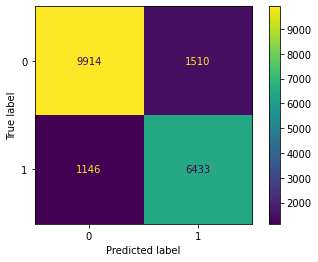

In [24]:
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [25]:
df_test =pd.read_csv('F:/COLLEGE/6TH SEMESTER/Predictive Analysis/Project/Dataset/test_D.csv')
df_test.shape

(25210, 42)

In [26]:
df_test.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,97.0,95.0,36.11,98.0,75.33,0.0,19.0,0.0,24.0,...,5.7,0.0,317.0,83.14,0,0.0,0.0,-0.03,2,0
1,2,89.0,99.0,36.11,122.0,86.00,0.0,22.0,0.0,24.0,...,5.7,0.0,317.0,83.14,0,0.0,0.0,-0.03,3,0
2,3,90.0,95.0,36.11,122.0,86.00,0.0,30.0,0.0,24.0,...,5.7,0.0,317.0,83.14,0,0.0,0.0,-0.03,4,0
3,4,103.0,88.5,36.11,122.0,91.33,0.0,24.5,0.0,24.0,...,5.7,0.0,317.0,83.14,0,0.0,0.0,-0.03,5,0
4,5,110.0,91.0,36.11,122.0,91.33,0.0,22.0,0.0,24.0,...,5.7,0.0,317.0,83.14,0,0.0,0.0,-0.03,6,0


In [27]:
X2_test = df_test[df_test.columns[0:40]].values


In [28]:
Y2_test = df_test[df_test.columns[41:]].values
Y2_test
labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)
Y2_test

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print("sepsis dimensions without label : {}".format(X2_test.shape))

sepsis dimensions without label : (25210, 40)


In [30]:
print("sepsis dimensions without label : {}".format(Y2_test.shape))

sepsis dimensions without label : (25210,)


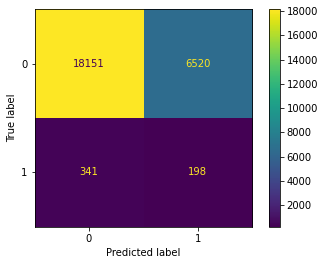

In [31]:
predicted =model.predict(X2_test)
cm=confusion_matrix(Y2_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [32]:
result = model.score(X2_test, Y2_test)
print(result)

0.7278460928203094


The accuracy is around 73% so we can infer that it is prediction whether is person has sepsis or not in a correct way